In [ ]:
%matplotlib inline
from google.colab import drive
import pickle
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import random
import tensorflow.keras.utils
import tensorflow.keras.models as models
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import joblib  # For saving and loading model
import time






In [ ]:
drive.mount("/content/drive", force_remount=True)
path ='drive/My Drive'

Xd = pickle.load(open(path+"/data/RML2016.10a_dict.pkl",'rb'),encoding = "bytes")
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)


snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
# in map(function, input) format, input = Xd.keys(); we feed to variable x, one key at a time
# then we apply another map; from above, we got a list = [(mod type, SNR)]
# so to each pair; when we do (mod type, SNR)[0] we get the mod type; (mod type, SNR)[1] gives the SNR value
print('**Original dataset**')
print("Dataset has modulation types", mods)
print("and SNR values", snrs)

#delete analogue modulation and keep only digital modulation schemes

mods_to_rmv = ['AM-DSB', 'AM-SSB', 'WBFM']  #mod names we need to remove
keys_to_rmv = [key for key in Xd.keys() if key[0] in mods_to_rmv]  #keys corresponding to all these mods
# we remove each key containing each of the analog mod types
Xd_digital = {key: Xd[key] for key in Xd if key not in keys_to_rmv}  #new dictionary containing only digital mod types
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd_digital.keys())))), [1,0])
print("   ")
print('**New dataset**')
print("Limit dataset to",len(list(mods)), "digital modulation schemes:", mods)

NameError: name 'drive' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Plot IQ samples of the frame
#plt.figure()
#plt.title(f"{modulation_str} with {snr[idx]}dB")
#plt.plot(data[idx])
#plt.show()

In [ ]:
np.random.seed(2020)
n_examples = X.shape[0]
n_train = n_examples // 2
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test = X[test_idx]

In [ ]:
#one-hot encoding the label
lb = preprocessing.LabelBinarizer()
lb.fit(np.asarray(lbl)[:,0])
print(lb.classes_)
lbl_encoded=lb.transform(np.asarray(lbl)[:,0])
y_train=lbl_encoded[train_idx]
y_test=lbl_encoded[test_idx]

[b'8PSK' b'AM-DSB' b'AM-SSB' b'BPSK' b'CPFSK' b'GFSK' b'PAM4' b'QAM16'
 b'QAM64' b'QPSK' b'WBFM']


In [ ]:
in_shp = list(X_train.shape[1:])
print(X_train.shape, in_shp)
classes = mods

(110000, 2, 128) [2, 128]


In [ ]:
np.max(X_train), np.min(X_train)

(0.16046731, -0.15494554)

In [ ]:
np.max(X_test), np.min(X_test)

(0.16422912, -0.15118897)

In [ ]:
model = models.Sequential()
# model.add(Reshape(in_shp+[1], input_shape=in_shp))
model.add(Reshape(in_shp + [1], input_shape = in_shp))

# model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (1, 16), activation ='relu'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (1, 2)))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(32, (2, 8), activation ='relu'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (1, 2)))
# model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Conv2D(16, (1, 4), activation ='relu'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (1, 2)))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Conv2D(32, (1, 3), activation ='relu'))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size = (1, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Conv2D(64, (1, 1), activation ='relu'))
# # model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (1, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # model.add(Conv2D(80, (1, 3)))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.5))
# # model.add(Activation('relu'))

# # model.add(Conv2D(80, (1, 3)))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.5))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size = (1, 2)))

# model.add(Conv2D(64, (1, 3), activation ='relu'))
# # model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Conv2D(64, (1, 3), activation ='relu'))
# # model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Flatten())
# # model.add(Dense(256)) # 256
# # model.add(Activation('relu'))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.5))
model.add(Dense(512, activation ='relu')) # 128
model.add(Dropout(0.5))

model.add(Dense(128, activation ='relu')) # 128
model.add(Dropout(0.5))

# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(len(classes), activation ='softmax'))
# model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 2, 128, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 2, 113, 64)        1088      
                                                                 
 dropout (Dropout)           (None, 2, 113, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 106, 32)        32800     
                                                                 
 dropout_1 (Dropout)         (None, 1, 106, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 103, 16)        2064      
                                                                 
 dropout_2 (Dropout)         (None, 1, 103, 16)        0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# model.fit(X_train_pca, y_train, batch_size = 128, steps_per_epoch = 110000//128, epochs = 5, verbose = 1,
#           validation_data = (X_test_pca, y_test), validation_batch_size = 128, validation_steps = 110000//128)
tic = time.time()
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 100, verbose = 1, validation_data = (X_test, y_test),
                    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1,
                                               mode = 'auto', restore_best_weights = True)])
toc = time.time()
training_time = toc - tic

print ("The training time is %.3f seconds" %(training_time))

Epoch 1/100
108/108 [==============================] - 18s 49ms/step - loss: 2.2850 - accuracy: 0.1330 - val_loss: 2.0860 - val_accuracy: 0.2117
Epoch 2/100
108/108 [==============================] - 4s 37ms/step - loss: 1.9486 - accuracy: 0.2577 - val_loss: 1.7737 - val_accuracy: 0.3325
Epoch 3/100
108/108 [==============================] - 4s 38ms/step - loss: 1.7116 - accuracy: 0.3465 - val_loss: 1.5835 - val_accuracy: 0.3923
Epoch 4/100
108/108 [==============================] - 4s 37ms/step - loss: 1.5757 - accuracy: 0.3942 - val_loss: 1.4829 - val_accuracy: 0.4234
Epoch 5/100
108/108 [==============================] - 4s 37ms/step - loss: 1.5027 - accuracy: 0.4213 - val_loss: 1.4228 - val_accuracy: 0.4499
Epoch 6/100
108/108 [==============================] - 5s 42ms/step - loss: 1.4432 - accuracy: 0.4477 - val_loss: 1.3435 - val_accuracy: 0.4824
Epoch 7/100
108/108 [==============================] - 5s 42ms/step - loss: 1.4003 - accuracy: 0.4625 - val_loss: 1.3299 - val_accuracy

In [ ]:
score = model.evaluate(X_test, y_test)
# score = model.evaluate(X_test_pca, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3438/3438 [==============================] - 12s 3ms/step - loss: 1.1536 - accuracy: 0.5535
Test loss: 1.1536065340042114
Test accuracy: 0.5534545183181763


In [ ]:
#from sklearn.metrics import classification_report
#y_predict =  model.predict(X_test)
#print(classification_report(np.argmax(y_test, axis = 1), y_predict))

In [ ]:
from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(y_predict, axis = 1)))

              precision    recall  f1-score   support

           0       0.79      0.52      0.63      9991
           1       0.53      0.67      0.59     10041
           2       0.26      0.94      0.41      9915
           3       0.89      0.57      0.69      9841
           4       0.76      0.64      0.69     10076
           5       0.83      0.63      0.72     10067
           6       0.83      0.70      0.76     10086
           7       0.33      0.03      0.05     10024
           8       0.48      0.75      0.59      9920
           9       0.88      0.52      0.66      9998
          10       0.67      0.12      0.20     10041

    accuracy                           0.55    110000
   macro avg       0.66      0.55      0.54    110000
weighted avg       0.66      0.55      0.54    110000



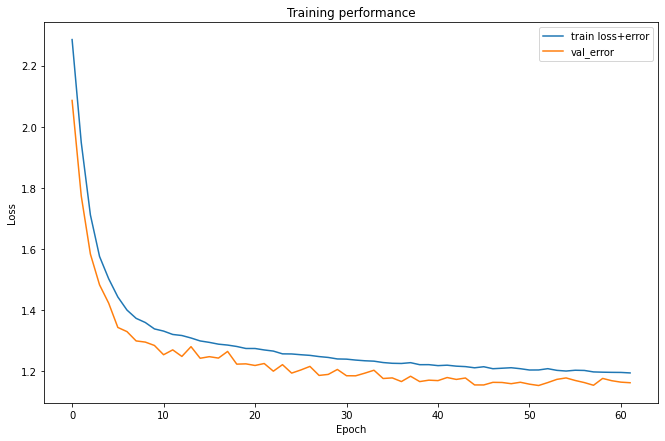

In [ ]:
plt.figure(figsize = (11, 7))
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label = 'train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label = 'val_error')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap = plt.cm.Blues, labels = []):
#     plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation = 45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def confusion_matrix(model, classes, X_test, y_test):
    test_Y_hat = model.predict(X_test, batch_size = 1024)
    conf = np.zeros([len(classes), len(classes)])
    confnorm = np.zeros([len(classes), len(classes)])

    for i in range(0, X_test.shape[0]):
        j = list(y_test[i,:]).index(1)
        k = int(np.argmax(test_Y_hat[i,:]))
        conf[j,k] = conf[j,k] + 1

    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])

    plot_confusion_matrix(confnorm, labels = classes)

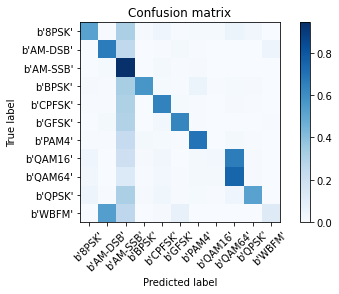

In [ ]:
confusion_matrix(model, classes, X_test, y_test)

In [ ]:
def getTestAccArray(model, lbl, X_test, y_test, test_idx):
    acc = []

    snr_array=np.asarray(lbl)[:,1]
    lb_temp = preprocessing.LabelBinarizer()
    lb_temp.fit(snr_array)
    temp_array=lb_temp.classes_
    snr_label_array = []
    test_SNRs=snr_array[test_idx]

    snr_label_array.append(temp_array[6])
    snr_label_array.append(temp_array[4])
    snr_label_array.append(temp_array[3])
    snr_label_array.append(temp_array[2])
    snr_label_array.append(temp_array[1])
    snr_label_array.append(temp_array[0])
    snr_label_array.append(temp_array[9])
    snr_label_array.append(temp_array[8])
    snr_label_array.append(temp_array[7])
    snr_label_array.append(temp_array[5])
    snr_label_array.append(temp_array[10])
    snr_label_array.append(temp_array[16])
    snr_label_array.append(temp_array[17])
    snr_label_array.append(temp_array[18])
    snr_label_array.append(temp_array[19])
    snr_label_array.append(temp_array[11])
    snr_label_array.append(temp_array[12])
    snr_label_array.append(temp_array[13])
    snr_label_array.append(temp_array[14])
    snr_label_array.append(temp_array[15])

    for snr in snr_label_array:
#         test_SNRs = map(lambda x: lbl[x][1], test_idx)
        test_X_i = X_test[np.where(test_SNRs==snr)]
        test_Y_i = y_test[np.where(test_SNRs==snr)]

        test_Y_i_hat = model.predict(test_X_i)
        conf = np.zeros([len(classes), len(classes)])
        confnorm = np.zeros([len(classes), len(classes)])

        for i in range(0, test_X_i.shape[0]):
            j = list(test_Y_i[i,:]).index(1)
            k = int(np.argmax(test_Y_i_hat[i,:]))
            conf[j,k] = conf[j,k] + 1

        for i in range(0, len(classes)):
            confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])

        plt.figure()
        SNR_value = snr.astype('int')
        plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(SNR_value))

        cor = np.sum(np.diag(conf))
        ncor = np.sum(conf) - cor
        print("Overall Accuracy: ", cor / (cor+ncor),"for SNR",snr)
#         acc[snr] = 1.0*cor/(cor+ncor)
        acc.append(1.0*cor/(cor+ncor))

    return acc

Overall Accuracy:  0.0923132183908046 for SNR b'-20'
Overall Accuracy:  0.0969154955283811 for SNR b'-18'
Overall Accuracy:  0.10043274432023079 for SNR b'-16'
Overall Accuracy:  0.12088514996342356 for SNR b'-14'
Overall Accuracy:  0.16478999106344952 for SNR b'-12'
Overall Accuracy:  0.2505057936361964 for SNR b'-10'
Overall Accuracy:  0.34541420118343197 for SNR b'-8'
Overall Accuracy:  0.47725196418783117 for SNR b'-6'
Overall Accuracy:  0.6084618142703478 for SNR b'-4'
Overall Accuracy:  0.7144153957879448 for SNR b'-2'
Overall Accuracy:  0.7971334068357222 for SNR b'0'
Overall Accuracy:  0.8136792452830188 for SNR b'2'
Overall Accuracy:  0.8045745654162855 for SNR b'4'
Overall Accuracy:  0.8172812328013208 for SNR b'6'
Overall Accuracy:  0.8103200287666307 for SNR b'8'
Overall Accuracy:  0.808506851752981 for SNR b'10'
Overall Accuracy:  0.802475878390679 for SNR b'12'
Overall Accuracy:  0.818926296633303 for SNR b'14'
Overall Accuracy:  0.8226071103008205 for SNR b'16'
Overall A

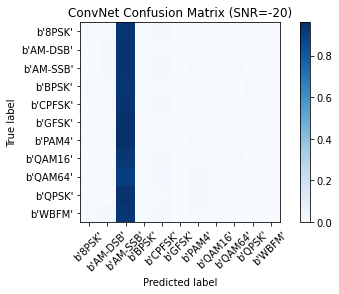

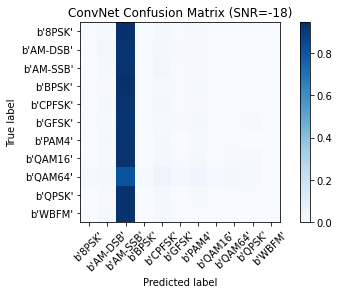

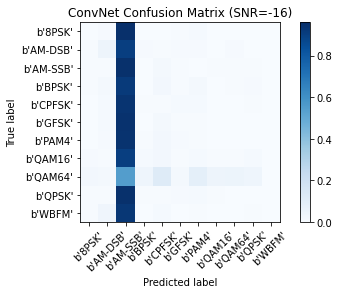

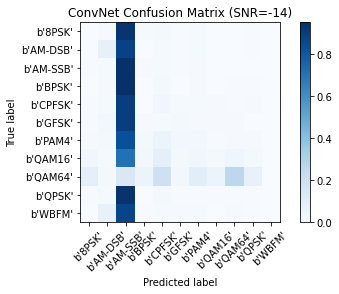

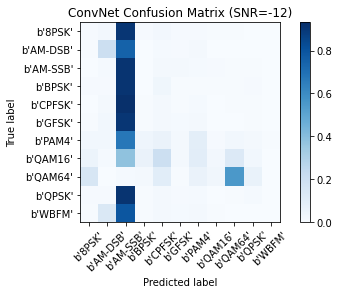

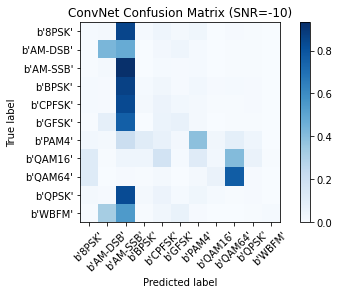

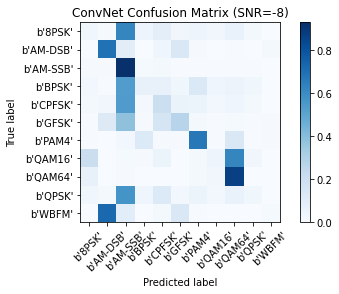

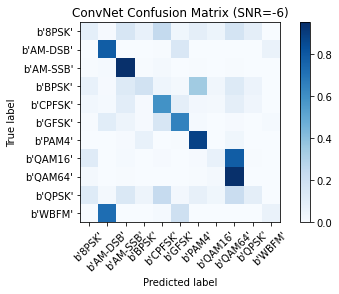

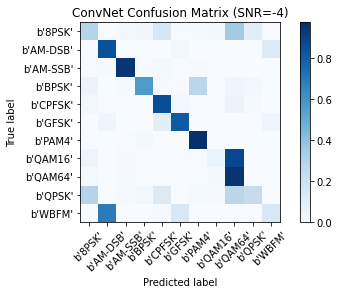

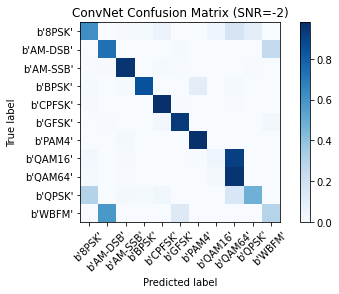

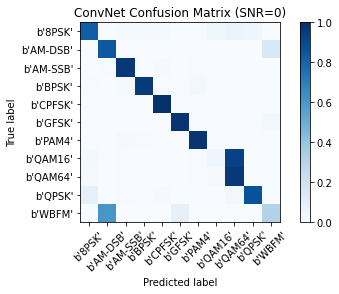

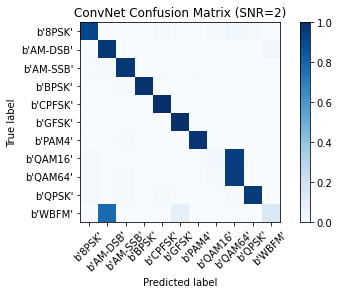

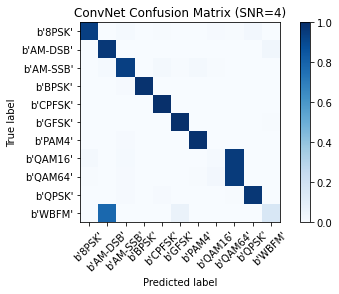

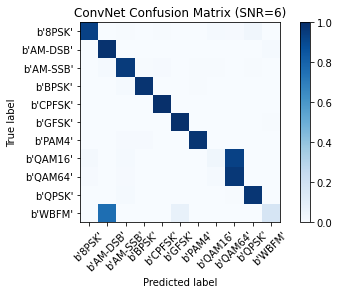

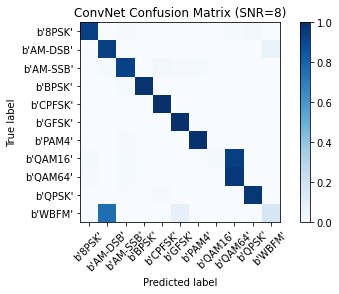

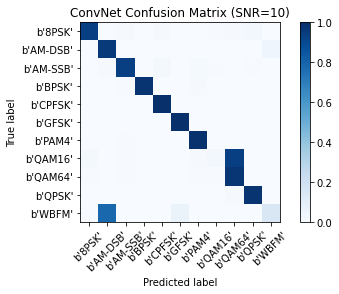

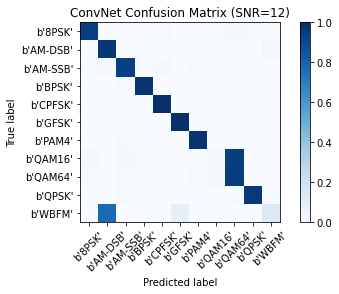

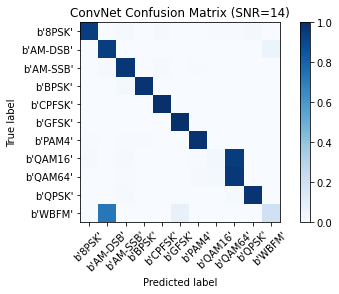

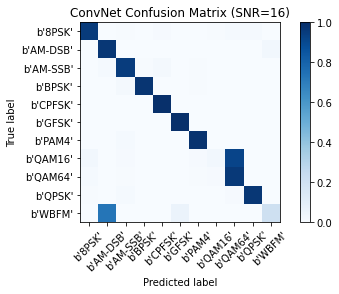

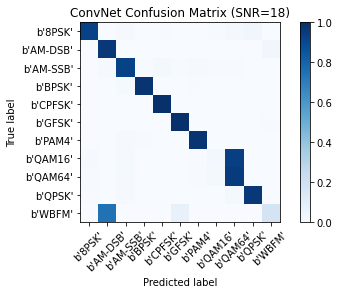

In [ ]:
acc = getTestAccArray(model, lbl, X_test, y_test, test_idx)

Text(0.5, 1.0, 'Accuracy vs SNRs')

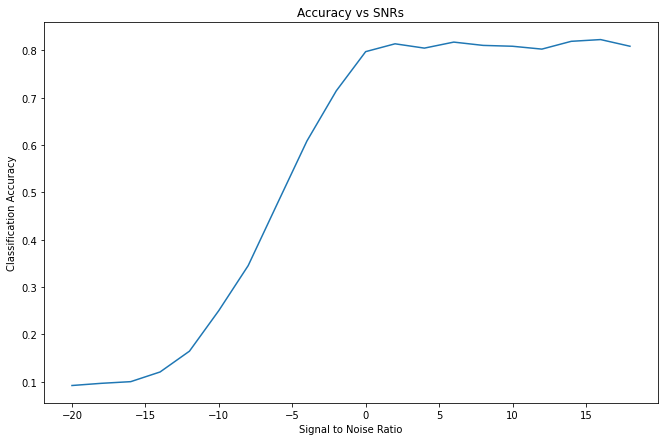

In [ ]:
# Plot accuracy curve
plt.figure(figsize = (11, 7))
plt.plot(snrs, acc)
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title('Accuracy vs SNRs')